<h1 style='color: green; font-size: 36px; font-weight: bold;'>Projeto de Regressão Linear</h1>

**Objetivo notebook**

O objetivo desse notebook é realizar uma analise dos resultados obtidos com o modelo de `Regressão Linear`, treinado no notebook `02_modelagem.ipynb`.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

## Leitura dos dados

In [2]:
# Leitura dos arquivos processados
X_train = pd.read_csv('../Data/processed/X_train_1.csv')
X_test = pd.read_csv('../Data/processed/X_test_1.csv')

y_train = pd.read_csv('../Data/processed/y_train_1.csv')
y_test = pd.read_csv('../Data/processed/y_test_1.csv')


# Carregar
with open('../models/linear_regression_1.pkl', 'rb') as f:
    modelo = pickle.load(f)

In [3]:
X_train.head(2)

,temp_max,chuva,fds
0,27.6,0.0,0
1,30.3,0.0,0


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>




<img width='600px' src='../img/reg_02.jpg'>

## 📉 Obtendo o Intercepto do Modelo

O **intercepto** representa o valor esperado de **Y** (Consumo de Cerveja) quando todas as variáveis explicativas são iguais a zero.

De forma mais simples, o intercepto indica o consumo médio de cerveja quando:

- `X₂` = Temperatura Máxima = 0 °C  
- `X₃` = Chuva = 0 mm  
- `X₄` = Final de Semana = 0 (não é fim de semana)


In [4]:
modelo.intercept_

np.float64(5951.9763393124485)

## 📊 Obtendo os Coeficientes de Regressão

Os **coeficientes de regressão** $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como **coeficientes parciais de regressão** ou **coeficientes parciais angulares**.

Considerando as variáveis explicativas do nosso modelo:

- $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se constantes os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana).

Esse coeficiente representa o efeito **direto ou líquido** de $X_2$ sobre $Y$, excluindo os efeitos de $X_3$ e $X_4$.

Os coeficientes $\beta_3$ e $\beta_4$ são interpretados de forma análoga.


In [5]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

X_train.columns

In [12]:
np.append(modelo.intercept_,modelo.coef_)

array([5951.97633931,  684.73675898,  -60.7824355 , 5401.08333866])

## Criando um DataFrame para armazenar os coeficientes do modelo

In [ ]:
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

pd.DataFrame(
    data = np.append(modelo.intercept_,modelo.coef_), 
    index=index, 
    columns=['Coeficiente'])

,Coeficiente
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## 📌 Interpretação dos Coeficientes Estimados

- **Intercepto** → Excluindo o efeito das variáveis explicativas ($X_2 = X_3 = X_4 = 0$), o efeito médio no consumo de cerveja seria de **5.951,98 litros**.

- **Temperatura Máxima (°C)** → Mantendo constantes os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana), o acréscimo de 1°C na Temperatura Máxima gera uma variação média no consumo de cerveja de **684,74 litros**.

- **Chuva (mm)** → Mantendo constantes os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana), o acréscimo de 1 mm de chuva gera uma variação média no consumo de cerveja de **–60,78 litros**.

- **Final de Semana (Sim/Não)** → Mantendo constantes os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva), o fato de o dia ser classificado como final de semana gera uma variação média no consumo de cerveja de **5.401,08 litros**.


# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo: TREINO</font>
<hr style='border: 2px solid red;'>

In [13]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

O `sns.scatterplot(x=..., y=...)` do Seaborn retorna um **objeto** `matplotlib.axes._axes.Axes` — ou seja, o objeto do gráfico em si, que representa o eixo onde os pontos estão desenhados.

In [20]:
y_train['target']

0      28742
1      30740
2      27387
3      27475
4      33517
       ...  
250    32872
251    23042
252    27724
253    27713
254    27989
Name: target, Length: 255, dtype: int64

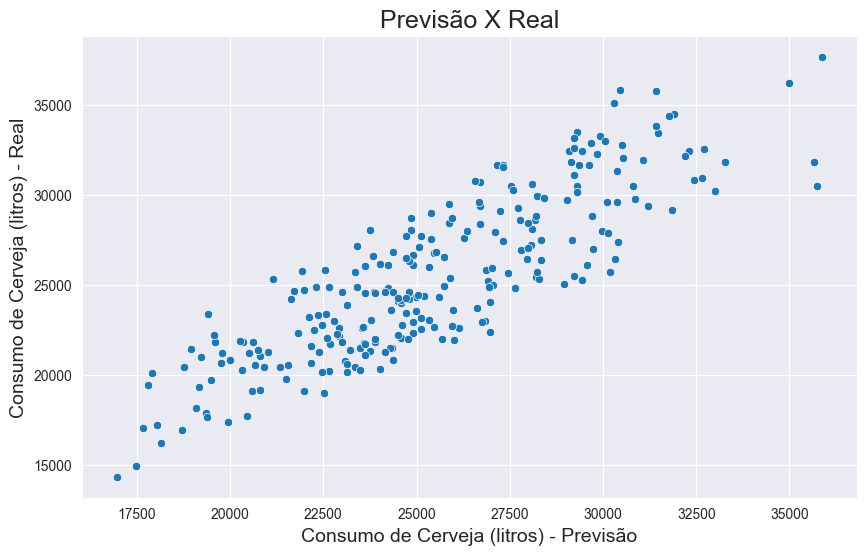

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)

sns.scatterplot(x=y_previsto_train, y=y_train['target'], ax=ax)
plt.show()

## Obtendo os resíduos

In [24]:
residuo = y_train['target'] - y_previsto_train

In [28]:
residuo_df = pd.DataFrame({
    'target': y_train['target'],
    'y_previsto': y_previsto_train,
    'Resíduo (diferença)': residuo
})
residuo_df.head()

,target,y_previsto,Resíduo (diferença)
0,28742,24850.710887,3891.289113
1,30740,26699.500137,4040.499863
2,27387,30397.078635,-3010.078635
3,27475,29179.289133,-1704.289133
4,33517,29293.162763,4223.837237


## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)


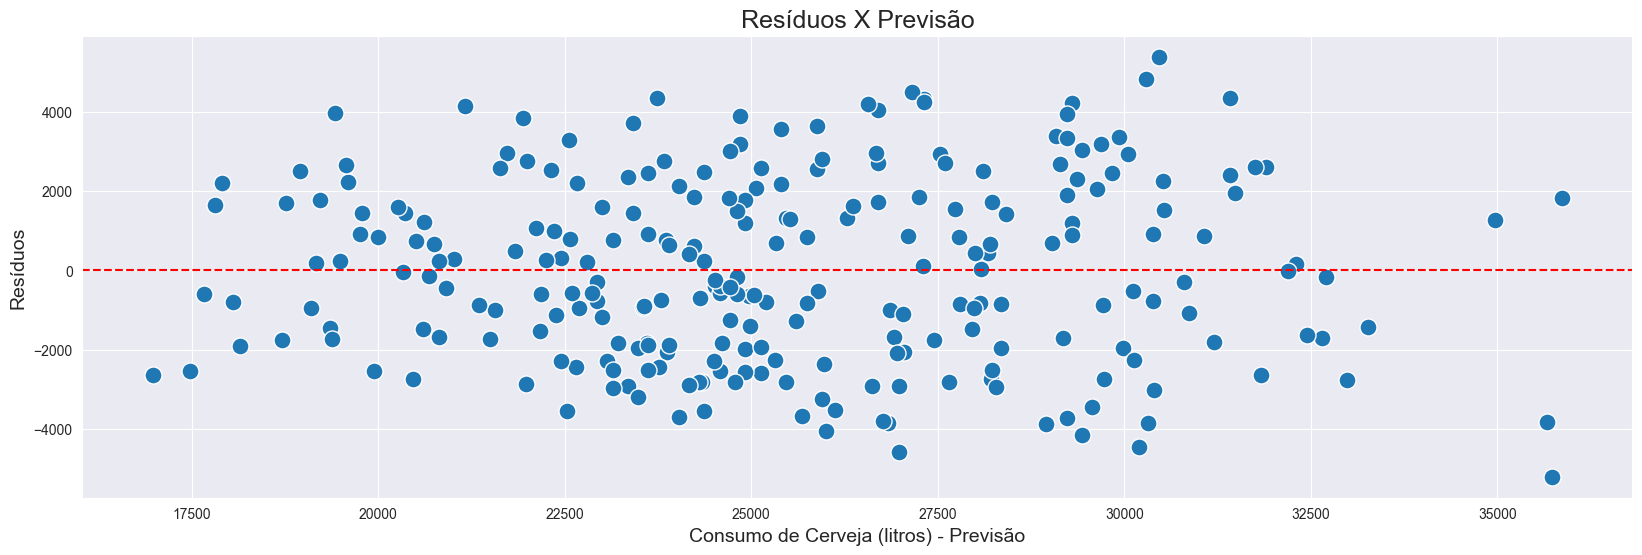

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.axhline(0, color='red', linestyle='--')

sns.scatterplot(x=y_previsto_train, y=residuo, ax=ax, s = 150)
plt.show()

### 📉 Homocedasticidade vs. Heterocedasticidade na Regressão

Ao analisar os resíduos de um modelo de regressão, um aspecto fundamental a verificar é a **constância da variância dos erros** — isto é, se há homocedasticidade ou heterocedasticidade.

---

#### ✅ Homocedasticidade

Os **resíduos possuem variância constante** ao longo de todos os valores previstos ou das variáveis explicativas.

- **Visualmente:** No gráfico de resíduos vs. valores previstos, os pontos se espalham de forma **uniforme** em torno do eixo horizontal.
- **Consequência:** Os testes estatísticos (valores-p, intervalos de confiança) são **válidos**.
- **Interpretação:** O modelo é estatisticamente confiável quanto à variância dos erros.

---

#### ❌ Heterocedasticidade

A **variância dos resíduos muda** ao longo do eixo dos valores previstos — por exemplo, cresce ou diminui com o valor de `y_pred`.

- **Visualmente:** O gráfico de resíduos mostra padrões como:
  - **funil** (abertura crescente),
  - **cone invertido**,
  - ou **algum padrão sistemático**.

- **Consequência:** Os erros padrão dos coeficientes ficam **inadequados**, resultando em:
  - **valores-p enganosos**,
  - **intervalos de confiança distorcidos**.

---
### **Utilizando os resíduos ao quadrado**

<img width='800px' src='../img/var_u.jpg'>

Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

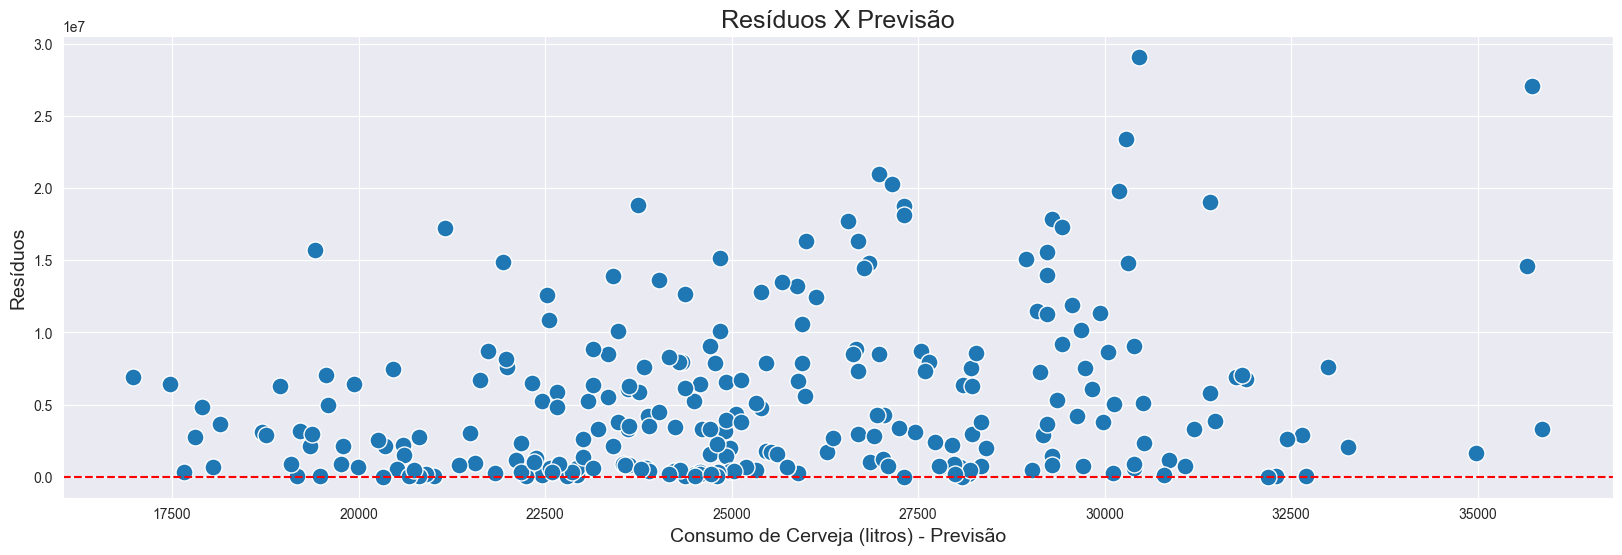

In [31]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.axhline(0, color='red', linestyle='--')

sns.scatterplot(x=y_previsto_train, y=residuo**2, ax=ax, s = 150)
plt.show()

## Plotando a distribuição de frequências dos resíduos

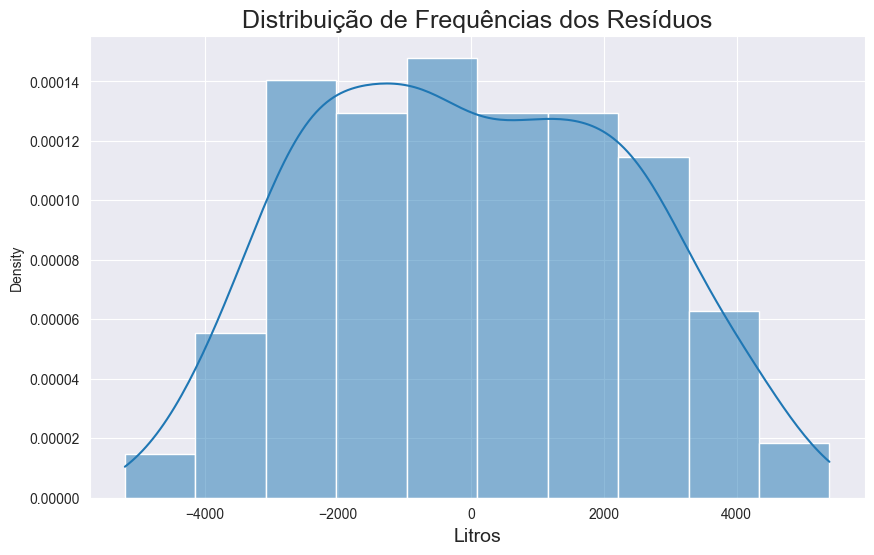

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)

sns.histplot(residuo, kde=True, stat='density',ax=ax)
plt.show()